In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [2]:
df = pd.read_csv('./total_esm.csv')

In [3]:
df.head()

,proteins,substrate,change,mutation,uniprot,num_value_gm,num_value_am,EC_ID,seq_str,esm,label
0,103,ethanol,-,-,Q6L0S1,0.056,0.056,1.1.1.1,MRAIVLERFGIENIKIEDIDDESPGIPVKITMAGLNPVDYSTVNGN...,"[0.03474235162138939, 0.2059604674577713, -0.0...",Q6L0S1|-
1,109,(R)-2-butanol,-,-,P39462,0.410,0.410,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-
2,109,(R)-2-pentanol,-,-,P39462,0.220,0.220,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-
3,109,(S)-2-butanol,-,-,P39462,0.012,0.012,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-
4,109,(S)-2-pentanol,-,-,P39462,0.070,0.070,1.1.1.1,MRAVRLVEIGKPLSLQEIGVPKPKGPQVLIKVEAAGVCHSDVHMRQ...,"[-0.028647541999816895, 0.27127352356910706, -...",P39462|-


In [4]:
df['esm'] = df['esm'].apply(ast.literal_eval)
X = np.array(df['esm'].tolist())
y = np.log10(df['num_value_gm'])
label = df['EC_ID']


In [ ]:
#find unique labels where label is a list of strings


dict1 = dict_from_file

#visualise the above dictionary as a tree
import networkx as nx
import matplotlib.pyplot as plt

#the above dictionary is a tree, so we can visualise it as a tree
G = nx.DiGraph(dict1)
nx.draw(G, with_labels=True)
plt.show()

             
#make it more interactive and readable
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()
        

In [ ]:
#cluster the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100)
kmeans.fit(X)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()


In [ ]:
#now optimize the number of clusters
from sklearn.metrics import silhouette_score

sil = []
kmax = 2000
kmin = 2
for k in range(kmin, kmax, 100):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

plt.plot(range(kmin, kmax, 100), sil)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

#now we can use the optimal number of clusters to cluster the data
kmeans = KMeans(n_clusters=200)#cluster the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100)
kmeans.fit(X)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()

kmeans.fit(X)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()

#what is silhouette score? explain the theory behind it
#silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)
#silhouette score ranges from -1 to 1. A score of 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
#A score of -1 indicates that the object is poorly matched to its own cluster and well matched to neighboring clusters.
#A score of 0 indicates that the object is on the boundary of the decision boundary between two neighboring clusters.
#silhouette score is a measure of how well the data has been clustered. A higher silhouette score indicates that the data has been well clustered.
#silhouette score is used to determine the optimal number of clusters in a dataset. The optimal number of clusters is the one that maximizes the silhouette score.
#silhouette score is calculated as the mean silhouette coefficient of all the data points in the dataset.
#silhouette coefficient is calculated as (b-a)/max(a,b), where a is the mean distance between a data point and all other data points in the same cluster and b is the mean distance between a data point and all other data points in the nearest cluster.
#silhouette score is a measure of how well the data has been clustered. A higher silhouette score indicates that the data has been well clustered.
#silhouette score is used to determine the optimal number of clusters in a dataset. The optimal number of clusters is the one that maximizes the silhouette score.
#silhouette score is calculated as the mean silhouette coefficient of all the data points in the dataset.

#what is the elbow method? explain the theory behind it
#The elbow method is a heuristic used to determine the optimal number of clusters in a dataset.
#The elbow method is based on the idea that the optimal number of clusters is the one that minimizes the within-cluster sum of squares (WCSS).
#WCSS is the sum of the squared distances between each data point and the centroid of its cluster.




#now depending on cluster group labels, make a list of ndarrays for each cluster
clustered_data = {}
for i in range(100):
    clustered_data[i] = []
for i in range(len(X)):
    clustered_data[labels[i]].append(X[i])

#now we can calculate the mean of each cluster
cluster_means = {}
for i in range(100):
    cluster_means[i] = np.mean(clustered_data[i], axis=0)
    
#now we can calculate the distance of each data point from the cluster mean
distances = []
for i in range(len(X)):
    distances.append(np.linalg.norm(X[i] - cluster_means[labels[i]]))
    
#now we can sort the data points based on the distance from the cluster mean
sorted_data = [x for _, x in sorted(zip(distances, X))]
sorted_labels = [x for _, x in sorted(zip(distances, labels))]
sorted_y = [x for _, x in sorted(zip(distances, y))]
sorted_label = [x for _, x in sorted(zip(distances, label))]
sorted_distances = sorted(distances)

#now we can plot the data points based on the distance from the cluster mean
plt.scatter(sorted_distances, sorted_y, c=sorted_labels, cmap='viridis')
plt.xlabel('Distance from Cluster Mean')
plt.ylabel('log10(num_value_gm)')
plt.show()


#now make a graph visualizing the cluster centres as nodes and the distance between them as edges, make the edge length proportional to the distance between the cluster centres
import networkx as nx
G = nx.Graph()
for i in range(100):
    G.add_node(i)
for i in range(100):
    for j in range(i+1, 100):
        G.add_edge(i, j, weight=np.linalg.norm(cluster_means[i] - cluster_means[j]))

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()



In [ ]:
del_km = np.log10(df['num_value_gm'])

In [ ]:
#statistical summary of del_km
print(del_km.describe())


count    24674.000000
mean        -0.728982
std          1.287110
min         -9.301030
25%         -1.568636
50%         -0.727012
75%          0.112642
max          4.230449
Name: num_value_gm, dtype: float64


In [5]:
#make a histogram of del_km
plt.hist(del_km, bins = 100)
plt.xlabel('log10(del_km)')
plt.ylabel('Frequency')
plt.title('Histogram of del_km')
plt.show()


NameError: name 'del_km' is not defined

In [50]:
#apllying the log10 transformation to the 'num_value_gm' column
df['num_value_gm'] = np.log10(df['num_value_gm'])
#apply ast literal eval to the 'esm' column
df['esm'] = df['esm'].apply(ast.literal_eval)

ValueError: malformed node or string: nan

In [8]:
# #normalize the data
# del_km_norm = (del_km - del_km.mean()) / del_km.std()


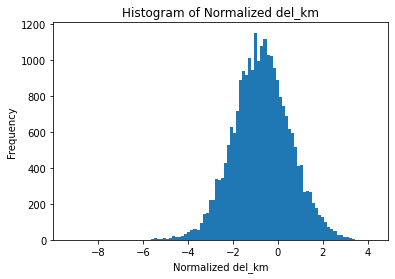

In [9]:
#make a histogram of del_km_norm
plt.hist(del_km, bins = 100)
plt.xlabel('Normalized del_km')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized del_km')
plt.show()


In [16]:
#shuffle del_km_norm
del_km = np.array(del_km)
#Now shuffle the data
np.random.seed(0)
np.random.shuffle(del_km)

In [17]:
len(del_km)

24674

In [18]:
del_km_norm_sample = del_km[:500]

In [19]:
len(del_km_norm_sample)

500

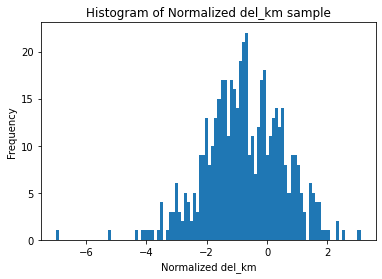

In [20]:
#Plot a histogram of the sample

plt.hist(del_km_norm_sample, bins = 100)
plt.xlabel('Normalized del_km')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized del_km sample')
plt.show()

In [21]:
#find mean and std of the sample
mean = np.mean(del_km_norm_sample)
std = np.std(del_km_norm_sample)
print(mean, std)

-0.7450344787317106 1.283706428507168


In [22]:
#make all pairs for the sample
df_pairs_sample = pd.DataFrame(columns=['num_value_gm.1', 'num_value_gm.2'])
#iterate with 2 loops over the del_km_norm and append the pairs to df_pairs

for i in range(len(del_km_norm_sample)):
    for j in range(i+1, len(del_km_norm_sample)):
        #use the concatenation function to append the pairs
        df_pairs_sample = pd.concat([df_pairs_sample, pd.DataFrame([[del_km_norm_sample[i], del_km_norm_sample[j]]], columns=['num_value_gm.1', 'num_value_gm.2'])], ignore_index=True)
        

/tmp/ipykernel_259476/3180139358.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_pairs_sample = pd.concat([df_pairs_sample, pd.DataFrame([[del_km_norm_sample[i], del_km_norm_sample[j]]], columns=['num_value_gm.1', 'num_value_gm.2'])], ignore_index=True)


In [24]:
len(df_pairs_sample)

124750

In [23]:
delta_km = df_pairs_sample['num_value_gm.1'] - df_pairs_sample['num_value_gm.2']
delta_km = np.array(delta_km)

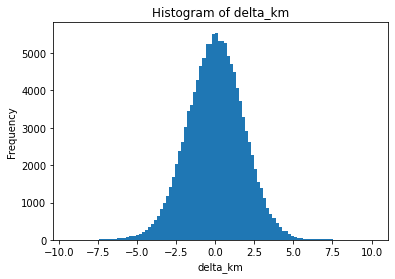

In [25]:
#Plot a histogram of delta_km
plt.hist(delta_km, bins = 100)
plt.xlabel('delta_km')
plt.ylabel('Frequency')
plt.title('Histogram of delta_km')
plt.show()


In [26]:
# remove all numbers greater than 2 and less than -2
delta_km_new = delta_km[(delta_km < 2) & (delta_km > -2)]


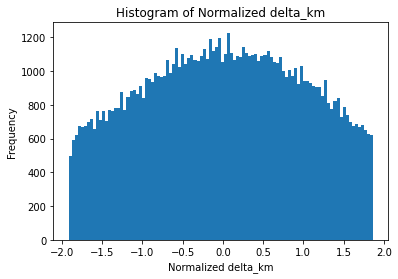

In [27]:
#normalize the data
delta_km_norm = (delta_km_new - delta_km_new.mean()) / delta_km_new.std()

#Plot a histogram of delta_km_norm
plt.hist(delta_km_norm, bins = 100)
plt.xlabel('Normalized delta_km')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized delta_km')
plt.show()


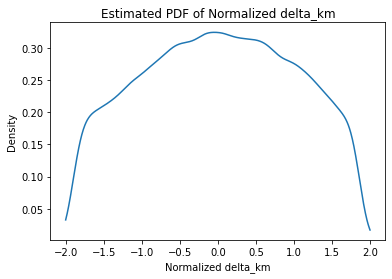

In [28]:
#estimate probability density function
from scipy.stats import gaussian_kde
kde = gaussian_kde(delta_km_norm)
x = np.linspace(-2, 2, 1000)
plt.plot(x, kde(x))
plt.xlabel('Normalized delta_km')
plt.ylabel('Density')
plt.title('Estimated PDF of Normalized delta_km')
plt.show()

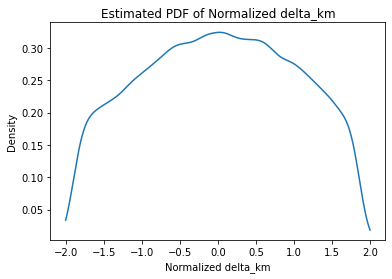

In [29]:
#now randomly remove 20% of the data between -0.5 and 0.5
np.random.seed(0)
indices = np.random.choice(np.arange(len(delta_km_norm)), int(0.2*len(delta_km_norm)), replace=False)
delta_km_norm[indices] = np.nan

#delete the nan values
delta_km_norm = delta_km_norm[~np.isnan(delta_km_norm)]

#Normalize the data again
delta_km_norm = (delta_km_norm - np.nanmean(delta_km_norm)) / np.nanstd(delta_km_norm)

#estimate probability density function
kde = gaussian_kde(delta_km_norm)
x = np.linspace(-2, 2, 1000)
plt.plot(x, kde(x))
plt.xlabel('Normalized delta_km')
plt.ylabel('Density')
plt.title('Estimated PDF of Normalized delta_km')
plt.show()


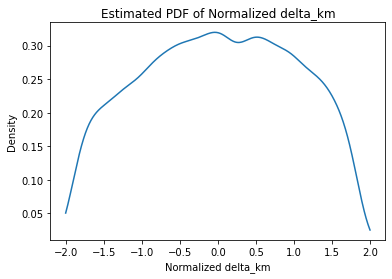

In [32]:
#now delete 40% of the data between -0.5 and 0.5 and repeat the process
np.random.seed(0)
indices = np.random.choice(np.arange(len(delta_km_norm)), int(0.4*len(delta_km_norm)), replace=False)
delta_km_norm[indices] = np.nan

#delete the nan values
delta_km_norm = delta_km_norm[~np.isnan(delta_km_norm)]

#Normalize the data again
delta_km_norm = (delta_km_norm - np.nanmean(delta_km_norm)) / np.nanstd(delta_km_norm)

#estimate probability density function

kde = gaussian_kde(delta_km_norm)
x = np.linspace(-2, 2, 1000)
plt.plot(x, kde(x))
plt.xlabel('Normalized delta_km')
plt.ylabel('Density')
plt.title('Estimated PDF of Normalized delta_km')
plt.show()



In [35]:
X = df['esm']
X = np.array(X)
print(X.shape)

(24674,)


In [36]:
df['esm'].head()

0    [ 0.03474235  0.20596047 -0.03128756 ... -0.06...
1    [-0.02864754  0.27127352 -0.05677309 ... -0.03...
2    [-0.02864754  0.27127352 -0.05677309 ... -0.03...
3    [-0.02864754  0.27127352 -0.05677309 ... -0.03...
4    [-0.02864754  0.27127352 -0.05677309 ... -0.03...
Name: esm, dtype: object

In [37]:
X

array(['[ 0.03474235  0.20596047 -0.03128756 ... -0.068277   -0.02810079\n  0.10760712]',
       '[-0.02864754  0.27127352 -0.05677309 ... -0.0355568  -0.00990734\n  0.08974016]',
       '[-0.02864754  0.27127352 -0.05677309 ... -0.0355568  -0.00990734\n  0.08974016]',
       ..., nan, nan, nan], dtype=object)